In [1]:
import pandas as pd

In [2]:
import seaborn as sns
%matplotlib inline

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
df =pd.read_csv(r"C:\Users\anjan\OneDrive\Desktop\Ecommerce - UK Retailer.csv")

In [6]:
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom  
...                 ...        ...         ...             ...  
541904  12/9/2011 12:50       0.85     12680.0          France  
541905  12/9/2011 12:50       2.10     12680.0          France  
541906  12/9/2011 12:50       4.15     12680.0          France  
541907  12/9/2011 12:50       4.15     12680.0          France  
541908  12/9/2011 12:50       4.95     12680.0          France  

[541909 rows x 8 columns]

In [7]:
print(df.isnull().values.any())

True


In [28]:
df.head(5)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [29]:
df[['Quantity','UnitPrice','InvoiceNo','StockCode','CustomerID']].describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [ ]:
## boxplot for all veriable

In [30]:
df[['Quantity','UnitPrice','InvoiceNo','StockCode','CustomerID']].plot.box()

<AxesSubplot:>

In [ ]:
### histogram for all veriable

In [41]:
df[['Quantity','UnitPrice','InvoiceNo','StockCode','CustomerID']].plot.hist(bins = 20, title = 'uniteprice according quantity')

<AxesSubplot:title={'center':'uniteprice according quantity'}, ylabel='Frequency'>

## Correlation-Heatmap plotting

In [43]:
corr = df[['Quantity','UnitPrice','InvoiceNo','StockCode','CustomerID']].corr()

In [44]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

In [ ]:
## Scattre plot for visualization

<AxesSubplot:title={'center':'CustomerID vs Unitprice'}, xlabel='CustomerID', ylabel='UnitPrice'>

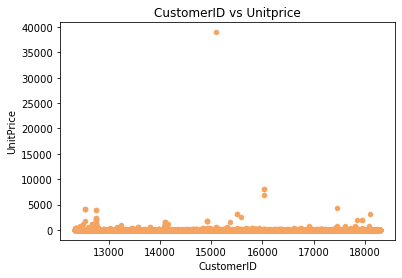

In [56]:
df.plot.scatter(x = 'CustomerID', y = 'UnitPrice',
                  color = 'sandybrown', title = 'CustomerID vs Unitprice')

In [69]:
df.Quantity.unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     56,     72,    200,
          600,    480,     -6,     14,     -2,     11,     33,     13,
           -4,     -5,     -7,     -3,     70,    252,     60,    216,
          384,    -10,     27,     15,     22,     19,     17,     21,
           34,     47,    108,     52,  -9360,    -38,     75,    270,
           42,    240,     90,    320,   1824,    204,     69,    -36,
         -192,   -144,    160,   2880,   1400,     39,    -48,    -50,
           26,   1440,     31,     82,     78,     97,     98,     35,
           57,    -20,    110,    -22,    -30,    -70,   -130,    -80,
         -120,    -40,    -25,    -14,    -15,    -69,   -140,   -320,
      

In [71]:
unique_indexes = df.StockCode.drop_duplicates().index
df[['StockCode','Description']].loc[unique_indexes]
ref_stock_desc = df[['StockCode','Description']].loc[unique_indexes] 
ref_stock_desc.index = range(len(ref_stock_desc)) 

In [73]:
df_quant_sold = df[['StockCode','Quantity']].groupby('StockCode').sum()
df_quant_sold.reset_index(inplace = True)
#order descending
df_quant_sold.sort_values(by = ['Quantity'], ascending = False, inplace = True)
#merge
df_quant_sold = df_quant_sold.merge(ref_stock_desc, on = 'StockCode')

In [74]:
df_quant_sold.head()

StockCode  Quantity                         Description
0     22197     56450                SMALL POPCORN HOLDER
1     84077     53847   WORLD WAR 2 GLIDERS ASSTD DESIGNS
2    85099B     47363             JUMBO BAG RED RETROSPOT
3    85123A     38830  WHITE HANGING HEART T-LIGHT HOLDER
4     84879     36221       ASSORTED COLOUR BIRD ORNAMENT

<AxesSubplot:title={'center':'Top 10 Sold Products By Quantity'}, xlabel='Description'>

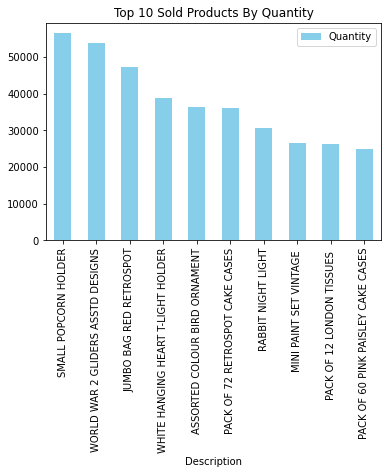

In [75]:
df_quant_sold.iloc[:10].plot.bar(x = 'Description', y = 'Quantity', 
                                 color = 'skyblue', 
                                 title = 'Top 10 Sold Products By Quantity')

In [7]:
df['UnitPrice'] = df['UnitPrice'].fillna(df['UnitPrice'].mode()[0])

In [8]:
df.UnitPrice.mode()

0    1.25
dtype: float64